### Python code to organise tweets into grids of 1km x 1km. Draw charts and/or figures to analyse the distribution of data. The coordinate system we used to collect data is London = [-0.563, 51.261318, 0.28036, 51.686031]

In [1]:
#Loading the dataset
import json
import os

#Combined data from all files
data = []

# Directory containing the JSON files
directory = r'C:\Users\Sarvesh\Desktop\WebScience_CW\datajson'

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            file_data = json.load(file)
            data.extend(file_data)

#printing the first and last element to verfiy all the data files are combined and loaded properly
print(data[0])
print(data[-1])

{'_id': 1565429028747616256, 'date': {'$date': '2022-09-01T19:58:59Z'}, 'screen_name': 'loststoryart', 'qualityScore': 0.5543859649122808, 'text': 'Just posted a photo @ London, United Kingdom https://t.co/WmczYM5N4H', 'url': 'https://t.co/Ejo6POjL2A', 'description': 'Artist/Dreamer', 'listed_count': 0, 'user_created': {'$date': '2014-09-06T16:58:45Z'}, 'geo_enabled': True, 'favourites_count': 12, 'coordinates': [-0.1094, 51.5141], 'location': 'London, England', 'followers_count': 105, ' friends_count': 105, 'place_name': 'City of London, London', 'place_country': 'United Kingdom', 'country_code': 'GB', 'place_coordinates': [[[-0.112442, 51.5068], [-0.0733794, 51.5068], [-0.0733794, 51.522161], [-0.112442, 51.522161]]], 'hashtags': [], 'mentions': [], 'source': 'Instagram'}
{'_id': 1575576182510141440, 'date': {'$date': '2022-09-29T20:00:09Z'}, 'screen_name': 'gretakaviya', 'qualityScore': 0.6087101449275362, 'text': 'Illustration 1 \n\nMuse: @uchjn \n// @pinterestuk \n: @arrtxart Oros

Number of rows: 48
Number of columns: 59


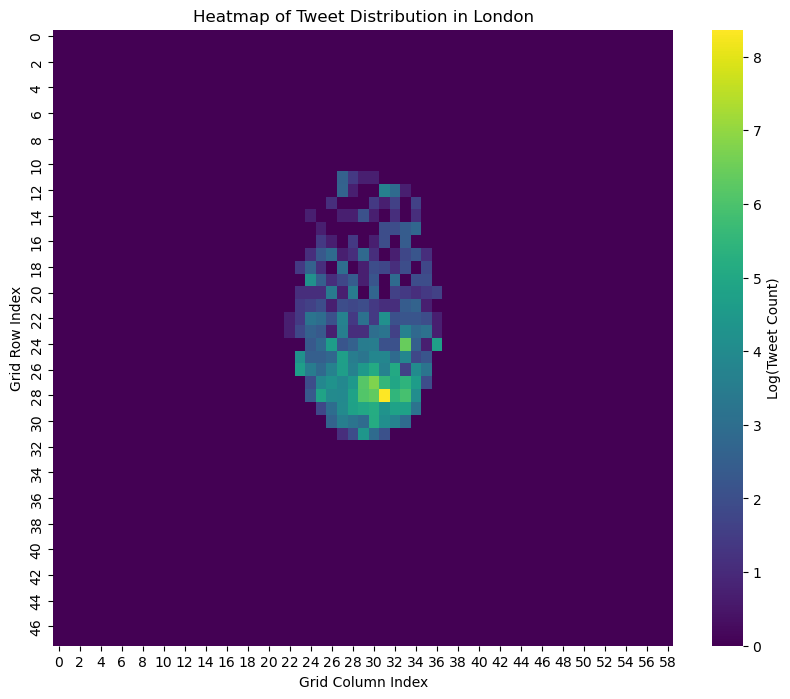

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for the heatmap
from math import radians, cos, sin, asin, sqrt
import math
# Define the London coordinate system
london_coordinates = [-0.563, 51.261318, 0.28036, 51.686031]


# Function to compute distance
def computeDistance(long1,lat1,long2, lat2):
    
    R = 6373.0
    phi1 = lat1 * (math.pi / 180)
    phi2 = lat2 * (math.pi / 180)
    
    delta1 = (lat2 - lat1) * (math.pi / 180)
    delta2 = (long2 - long1) * (math.pi / 180)
    
    a = math.sin(delta1 / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta2 / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    
    return d

num_rows = int(np.ceil(computeDistance(london_coordinates[0], london_coordinates[1], london_coordinates[0], london_coordinates[3])))
num_cols = int(np.ceil(computeDistance(london_coordinates[0], london_coordinates[1], london_coordinates[2], london_coordinates[1])))
num_grids = num_rows * num_cols  # Compute the total number of grids
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Initialize grid with zeros   
grid = np.zeros((num_rows, num_cols))
grid_size = 1 /100  # 1km x 1km grid size

lonOffset = (london_coordinates[2] - london_coordinates[0]) / num_cols
latOffset = (london_coordinates[3] - london_coordinates[1]) / num_rows


coordinates=[]
for tweet in range(len(data)):
    if 'coordinates' in data[tweet]:
        coordinates.append(data[tweet]['coordinates'])

for coord in coordinates:
    lon, lat = coord
    row_index = int((lat - london_coordinates[1]) // latOffset)
    col_index = int((lon - london_coordinates[0]) // lonOffset)
    if 0 <= row_index < num_rows and 0 <= col_index < num_cols:
        grid[row_index, col_index] += 1

# Visualization using Seaborn's heatmap
plt.figure(figsize=(10, 8))
grid_log = np.log(grid + 1)  # Apply logarithmic transformation
sns.heatmap(grid_log, cmap='viridis', cbar_kws={'label': 'Log(Tweet Count)'})
plt.title('Heatmap of Tweet Distribution in London')
plt.xlabel('Grid Column Index')
plt.ylabel('Grid Row Index')
plt.show()


### Statistical analysis of the dataset

In [3]:
# Calculate total number of tweets
total_tweets = len(coordinates)

# Calculate tweets per cell
tweets_per_cell = grid.flatten()
average_tweets_per_cell = np.mean(tweets_per_cell)
max_tweets_per_cell = np.max(tweets_per_cell)
min_tweets_per_cell = np.min(tweets_per_cell)

# Calculate distribution of tweets across cells
cells_with_tweets = np.count_nonzero(tweets_per_cell)
cells_without_tweets = num_grids - cells_with_tweets
percentage_cells_with_tweets = (cells_with_tweets / num_grids) * 100
percentage_cells_without_tweets = (cells_without_tweets / num_grids) * 100

# Print statistics
print("Statistics of the Data:")
print(f"Total number of tweets: {total_tweets}")
print(f"Average tweets per cell: {average_tweets_per_cell}")
print(f"Maximum tweets per cell: {max_tweets_per_cell}")
print(f"Minimum tweets per cell: {min_tweets_per_cell}")
print(f"Number of cells with tweets: {cells_with_tweets} ({percentage_cells_with_tweets:.2f}% of total cells)")
print(f"Number of cells without tweets: {cells_without_tweets} ({percentage_cells_without_tweets:.2f}% of total cells)")


Statistics of the Data:
Total number of tweets: 13192
Average tweets per cell: 4.65819209039548
Maximum tweets per cell: 4298.0
Minimum tweets per cell: 0.0
Number of cells with tweets: 203 (7.17% of total cells)
Number of cells without tweets: 2629 (92.83% of total cells)


### Histrogram creation to visualize distribution of tweets

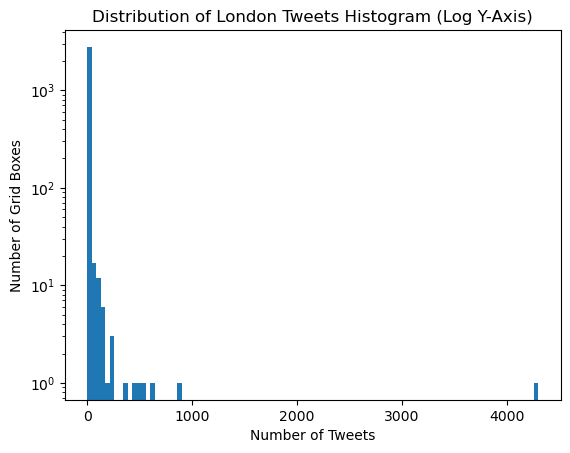

In [4]:
# Convert grid values into a 1D array
grid_totals_list = grid.flatten()

# Plot histogram
plt.hist(grid_totals_list, bins=100, log=True)
plt.ylabel("Number of Grid Boxes")
plt.xlabel("Number of Tweets")
plt.title("Distribution of London Tweets Histogram (Log Y-Axis)")
plt.savefig('distlondontweetslog.png')
plt.show()

### Top 10 grids which have highest tweets made from

In [5]:
# Calculate total number of tweets
total_tweets = len(coordinates)

# Calculate tweets per cell
tweets_per_cell = grid.flatten()

# Find the indices of the top 10 grid boxes with the highest tweet counts
top_10_indices = np.argsort(tweets_per_cell)[::-1][:10]

# Extract the tweet counts and corresponding grid indices for the top 10 grid boxes
top_10_tweet_counts = tweets_per_cell[top_10_indices]
top_10_grid_indices = [(index // num_cols, index % num_cols) for index in top_10_indices]

# Print total number of tweets
print("Total number of tweets:", total_tweets)

# Print the top 10 grid boxes along with their tweet counts
print("\nTop 10 Grid Boxes with the Highest Tweet Counts:")
for i, (row, col) in enumerate(top_10_grid_indices, 1):
    print(f"{i}. Grid Box ({row}, {col}): {top_10_tweet_counts[i-1]} tweets")


Total number of tweets: 13192

Top 10 Grid Boxes with the Highest Tweet Counts:
1. Grid Box (28, 31): 4298.0 tweets
2. Grid Box (27, 30): 863.0 tweets
3. Grid Box (24, 33): 605.0 tweets
4. Grid Box (28, 30): 550.0 tweets
5. Grid Box (27, 29): 478.0 tweets
6. Grid Box (28, 29): 436.0 tweets
7. Grid Box (28, 33): 368.0 tweets
8. Grid Box (27, 31): 251.0 tweets
9. Grid Box (28, 32): 239.0 tweets
10. Grid Box (27, 33): 223.0 tweets


#### Number of Tweets from other sources

In [6]:
from collections import Counter
other_apps = []
for tweet in data:
    other_apps.append(tweet['source'])

Counter(other_apps)

Counter({'Instagram': 10529,
         'CareerArc 2.0': 720,
         'Foursquare': 656,
         'everybot': 313,
         'dlvr.it': 259,
         'Untappd': 233,
         'Foursquare Swarm': 194,
         'Planning Application Bot': 100,
         'Squarespace': 39,
         'local.angle': 25,
         'Tweetbot for iΟS': 12,
         'Estate Agent Feeds': 11,
         'TweetCaster for Android': 11,
         'Wikishire': 9,
         'callingallpapers.com': 8,
         'Hootsuite Inc.': 6,
         'trendsmetadata': 6,
         'FL': 6,
         'Hackney-a-la-mode': 5,
         'IWPTweets': 5,
         'Tweetbot for Mac': 5,
         'Vero - True Social': 4,
         'World Flags': 4,
         'Good Stuff Tweeter': 4,
         'trainlogger': 4,
         "edent's Tweeting Robot": 3,
         'Leading Restaurants': 2,
         'objectpost': 2,
         'I Heart Locations': 2,
         'Out On A Shout Bot': 1,
         'BLUF.com': 1,
         'Fenix 2': 1,
         'citydescriber': 1,
   

### The set of high-quality, low-quality and background tweets is utilized. Developing newsworthy scoring method based on this dataset. Empirically adjust the thresholds to modify newsworthiness and discuss the results.

In [7]:
import json
import math
from collections import Counter

class RawNewsworthiness:
    def __init__(self, bg_quality_path, high_quality_path, low_quality_path):
        self.bg_quality_data = self.load_json_lines(bg_quality_path)
        self.high_quality_data = self.load_json_lines(high_quality_path)
        self.low_quality_data = self.load_json_lines(low_quality_path)
        
        # Compute term frequencies and total frequencies for each dataset
        self.tf_bg, self.f_bg = self.count_term_frequencies(self.bg_quality_data)
        self.tf_hq, self.f_hq = self.count_term_frequencies(self.high_quality_data)
        self.tf_lq, self.f_lq = self.count_term_frequencies(self.low_quality_data)
        
        # Compute the likelihood ratios and scores
        self.s_hq, self.s_lq = self.compute_scores(*self.compute_likelihood_ratios())

    def load_json_lines(self, file_path):
        data = []
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                data.append(json.loads(line))
        return data

    def count_term_frequencies(self, data):
        term_freq = Counter()
        for item in data:
            terms = item['text'] if isinstance(item['text'], list) else item['text'].split()
            term_freq.update(terms)
        return term_freq, sum(term_freq.values())

    def compute_likelihood_ratios(self, smoothing=1):
        compute_ratio = lambda tf, f: {term: (tf.get(term, 0) / f) / ((self.tf_bg.get(term, 0) + smoothing) / self.f_bg) for term in tf}
        return compute_ratio(self.tf_hq, self.f_hq), compute_ratio(self.tf_lq, self.f_lq)

    def compute_scores(self, r_hq, r_lq, threshold=2.0):
        filter_scores = lambda r: {term: ratio for term, ratio in r.items() if ratio >= threshold}
        return filter_scores(r_hq), filter_scores(r_lq)

    def calculate_newsworthiness_score(self, document):
        sum_s_hq = sum(self.s_hq.get(term, 0) for term in document.split())
        sum_s_lq = sum(self.s_lq.get(term, 0) for term in document.split())
        num_terms = len(document.split())
        return math.log2((1 + sum_s_hq) / (1 + sum_s_lq))

    def analyze_tweets(self):
        for i, tweet in enumerate(self.high_quality_data):
            if i < 10:  # Only analyze the first 5 tweets
                score = self.calculate_newsworthiness_score(tweet['text'])
                print(f'Tweet: {tweet["text"]}\nScore: {score}\n')

analyzer = RawNewsworthiness('C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/bgQuality.json', 'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/highQuality.json', 'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/lowQuality.json')
analyzer.analyze_tweets()

Tweet: Turisteando (@ Piccadilly Circus in London, Greater London) https://t.co/ear25pmZNc https://t.co/528VOdxIeF
Score: 0.7794345396204742

Tweet: Less perfection, more authenticity  purrrrrr :by @whatkseniasees • styling: @sofichetrar • @namedmodels @ London, United Kingdom https://t.co/ndfF2W9pjN
Score: 0.32081857639960626

Tweet: Mastercard is hiring in England! Read about our latest #Finance job opening via the link in our bio: Director, Mergers and Acquisitions
Score: 0.14553068173658393

Tweet: #sunset #SouthLondon 
#سبحان_الله @ Crystal Palace, London https://t.co/VAScc6loZK
Score: 1.000287237986328

Tweet: What a beautiful setting designed by @stevegiannetti &amp; Anna Busta. @ London, United Kingdom https://t.co/x5IAY6uguE
Score: 0.2686534220609207

Tweet: tulip season  @ Notting Hill https://t.co/Vd1pr2Cc2p
Score: 0.7059776863691203

Tweet: You are enough - don’t forget it #youareenough #youarenotalone #youareloved #thursdaythoughts #procreate #trusttheprocess #pamelaoliver

### Calculating newsworthiness score of uncleaned data with threshold = 2 and providing statistics.

In [8]:
import json
import math
from collections import Counter
import numpy as np
from prettytable import PrettyTable

class RawNewsworthiness:
    def __init__(self, bg_quality_path, high_quality_path, low_quality_path):
        self.bg_quality_data = self.load_json_lines(bg_quality_path)
        self.high_quality_data = self.load_json_lines(high_quality_path)
        self.low_quality_data = self.load_json_lines(low_quality_path)
        
        # Compute term frequencies and total frequencies for each dataset
        self.tf_bg, self.f_bg = self.count_term_frequencies(self.bg_quality_data)
        self.tf_hq, self.f_hq = self.count_term_frequencies(self.high_quality_data)
        self.tf_lq, self.f_lq = self.count_term_frequencies(self.low_quality_data)
        
        # Compute the likelihood ratios and scores
        self.s_hq, self.s_lq = self.compute_scores(*self.compute_likelihood_ratios())

    def load_json_lines(self, file_path):
        data = []
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                data.append(json.loads(line))
        return data

    def count_term_frequencies(self, data):
        term_freq = Counter()
        for item in data:
            terms = item['text'] if isinstance(item['text'], list) else item['text'].split()
            term_freq.update(terms)
        return term_freq, sum(term_freq.values())

    def compute_likelihood_ratios(self, smoothing=1):
        compute_ratio = lambda tf, f: {term: (tf.get(term, 0) / f) / ((self.tf_bg.get(term, 0) + smoothing) / self.f_bg) for term in tf}
        return compute_ratio(self.tf_hq, self.f_hq), compute_ratio(self.tf_lq, self.f_lq)

    def compute_scores(self, r_hq, r_lq, threshold=2.0):
        filter_scores = lambda r: {term: ratio for term, ratio in r.items() if ratio >= threshold}
        return filter_scores(r_hq), filter_scores(r_lq)

    def calculate_newsworthiness_score(self, document):
        sum_s_hq = sum(self.s_hq.get(term, 0) for term in document.split())
        sum_s_lq = sum(self.s_lq.get(term, 0) for term in document.split())
        num_terms = len(document.split())
        return math.log2((1 + sum_s_hq) / (1 + sum_s_lq ))

    def proportion_newsworthy_hq(self):
        num_newsworthy = sum(1 for tweet in self.high_quality_data if self.calculate_newsworthiness_score(tweet['text']) >= 0)
        return num_newsworthy / len(self.high_quality_data)

    def average_score_hq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.high_quality_data]
        return np.mean(scores)

    def std_dev_scores_hq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.high_quality_data]
        return np.std(scores)

    def proportion_newsworthy_lq(self):
        num_newsworthy = sum(1 for tweet in self.low_quality_data if self.calculate_newsworthiness_score(tweet['text']) >= 0)
        return num_newsworthy / len(self.low_quality_data)

    def average_score_lq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.low_quality_data]
        return np.mean(scores)

    def std_dev_scores_lq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.low_quality_data]
        return np.std(scores)
    

analyzer = RawNewsworthiness('C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/bgQuality.json', 'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/highQuality.json', 'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/lowQuality.json')
print("Proportion of HQ texts classified as Newsworthy:", analyzer.proportion_newsworthy_hq())
print("Average score of HQ text:", analyzer.average_score_hq())
print("Standard Dev. of HQ text scores:", analyzer.std_dev_scores_hq())
print("Proportion of LQ texts classified as Newsworthy:", analyzer.proportion_newsworthy_lq())
print("Average score of LQ text:", analyzer.average_score_lq())
print("Standard Dev. of LQ text scores:", analyzer.std_dev_scores_lq())


table = PrettyTable()

# Add columns
table.field_names = ["Metric", "HQ Texts", "LQ Texts"]

# Add rows
table.add_row(["Proportion of texts classified as Newsworthy", analyzer.proportion_newsworthy_hq(), analyzer.proportion_newsworthy_lq()])
table.add_row(["Average score of text", analyzer.average_score_hq(), analyzer.average_score_lq()])
table.add_row(["Standard Dev. of text scores", analyzer.std_dev_scores_hq(), analyzer.std_dev_scores_lq()])

# Print the table
print(table)

Proportion of HQ texts classified as Newsworthy: 0.8576569372251099
Average score of HQ text: 0.49530603076066476
Standard Dev. of HQ text scores: 0.7093033543518993
Proportion of LQ texts classified as Newsworthy: 0.5094957432874918
Average score of LQ text: -1.0430383843420663
Standard Dev. of LQ text scores: 1.4315841252234036
+----------------------------------------------+---------------------+---------------------+
|                    Metric                    |       HQ Texts      |       LQ Texts      |
+----------------------------------------------+---------------------+---------------------+
| Proportion of texts classified as Newsworthy |  0.8576569372251099 |  0.5094957432874918 |
|            Average score of text             | 0.49530603076066476 | -1.0430383843420663 |
|         Standard Dev. of text scores         |  0.7093033543518993 |  1.4315841252234036 |
+----------------------------------------------+---------------------+---------------------+


### Calculating newsworthiness score of uncleaned data with threshold = [1.5, 2.5, 3, 3.5, 4] and providing statistics.

In [9]:
import json
import math
from collections import Counter
import numpy as np

class RawNewsworthiness:
    def __init__(self, bg_quality_path, high_quality_path, low_quality_path):
        self.bg_quality_data = self.load_json_lines(bg_quality_path)
        self.high_quality_data = self.load_json_lines(high_quality_path)
        self.low_quality_data = self.load_json_lines(low_quality_path)
        
        # Compute term frequencies and total frequencies for each dataset
        self.tf_bg, self.f_bg = self.count_term_frequencies(self.bg_quality_data)
        self.tf_hq, self.f_hq = self.count_term_frequencies(self.high_quality_data)
        self.tf_lq, self.f_lq = self.count_term_frequencies(self.low_quality_data)
        
        # Compute the likelihood ratios and scores
        self.s_hq, self.s_lq = self.compute_scores(*self.compute_likelihood_ratios())

    def load_json_lines(self, file_path):
        data = []
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                data.append(json.loads(line))
        return data

    def count_term_frequencies(self, data):
        term_freq = Counter()
        for item in data:
            terms = item['text'] if isinstance(item['text'], list) else item['text'].split()
            term_freq.update(terms)
        return term_freq, sum(term_freq.values())

    def compute_likelihood_ratios(self, smoothing=1):
        compute_ratio = lambda tf, f: {term: (tf.get(term, 0) / f) / ((self.tf_bg.get(term, 0) + smoothing) / self.f_bg) for term in tf}
        return compute_ratio(self.tf_hq, self.f_hq), compute_ratio(self.tf_lq, self.f_lq)

    def compute_scores(self, r_hq, r_lq, threshold=2.0):
        filter_scores = lambda r: {term: ratio for term, ratio in r.items() if ratio >= threshold}
        return filter_scores(r_hq), filter_scores(r_lq)

    def calculate_newsworthiness_score(self, document):
        sum_s_hq = sum(self.s_hq.get(term, 0) for term in document.split())
        sum_s_lq = sum(self.s_lq.get(term, 0) for term in document.split())
        num_terms = len(document.split())
        return math.log2((1 + sum_s_hq) / (1 + sum_s_lq ))

    def proportion_newsworthy_hq(self):
        num_newsworthy = sum(1 for tweet in self.high_quality_data if self.calculate_newsworthiness_score(tweet['text']) >= 0)
        return num_newsworthy / len(self.high_quality_data)

    def average_score_hq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.high_quality_data]
        return np.mean(scores)

    def std_dev_scores_hq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.high_quality_data]
        return np.std(scores)

    def proportion_newsworthy_lq(self):
        num_newsworthy = sum(1 for tweet in self.low_quality_data if self.calculate_newsworthiness_score(tweet['text']) >= 0)
        return num_newsworthy / len(self.low_quality_data)

    def average_score_lq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.low_quality_data]
        return np.mean(scores)

    def std_dev_scores_lq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.low_quality_data]
        return np.std(scores)
    
# Example usage:
thresholds = [1.5, 2.5, 3, 3.5, 4]

for threshold in thresholds:
    print(f"Threshold: {threshold}")
    analyzer = RawNewsworthiness('C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/bgQuality.json', 
                            'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/highQuality.json', 
                            'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/lowQuality.json')
    analyzer.s_hq, analyzer.s_lq = analyzer.compute_scores(*analyzer.compute_likelihood_ratios(threshold))
    print("Proportion of HQ texts classified as Newsworthy:", analyzer.proportion_newsworthy_hq())
    print("Average score of HQ text:", analyzer.average_score_hq())
    print("Standard Dev. of HQ text scores:", analyzer.std_dev_scores_hq())
    print("Proportion of LQ texts classified as Newsworthy:", analyzer.proportion_newsworthy_lq())
    print("Average score of LQ text:", analyzer.average_score_lq())
    print("Standard Dev. of LQ text scores:", analyzer.std_dev_scores_lq())
    print()
    
    table = PrettyTable()

    # Add columns
    table.field_names = ["Metric", "HQ Texts", "LQ Texts"]

    # Add rows
    table.add_row(["Proportion of texts classified as Newsworthy", analyzer.proportion_newsworthy_hq(), analyzer.proportion_newsworthy_lq()])
    table.add_row(["Average score of text", analyzer.average_score_hq(), analyzer.average_score_lq()])
    table.add_row(["Standard Dev. of text scores", analyzer.std_dev_scores_hq(), analyzer.std_dev_scores_lq()])

    # Print the table
    print(table)


Threshold: 1.5
Proportion of HQ texts classified as Newsworthy: 0.8568572570971611
Average score of HQ text: 0.4865968325771566
Standard Dev. of HQ text scores: 0.7222513754277465
Proportion of LQ texts classified as Newsworthy: 0.510150622134905
Average score of LQ text: -1.0458629780298343
Standard Dev. of LQ text scores: 1.431653803819689

+----------------------------------------------+--------------------+---------------------+
|                    Metric                    |      HQ Texts      |       LQ Texts      |
+----------------------------------------------+--------------------+---------------------+
| Proportion of texts classified as Newsworthy | 0.8568572570971611 |  0.510150622134905  |
|            Average score of text             | 0.4865968325771566 | -1.0458629780298343 |
|         Standard Dev. of text scores         | 0.7222513754277465 |  1.431653803819689  |
+----------------------------------------------+--------------------+---------------------+
Threshold: 

### Calculating newsworthiness score of cleaned data with threshold = [1.5, 2.5, 3, 3.5, 4] and providing statistics.

In [10]:
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class CleanedNewsworthiness:
    def __init__(self, bg_quality_path, high_quality_path, low_quality_path):
        self.bg_quality_data = self.load_json_lines(bg_quality_path)
        self.high_quality_data = self.load_json_lines(high_quality_path)
        self.low_quality_data = self.load_json_lines(low_quality_path)
        
        # Remove stopwords
        self.stop_words = set(stopwords.words('english'))
        self.remove_stopwords_from_data()

        # Compute term frequencies and total frequencies for each dataset
        self.tf_bg, self.f_bg = self.count_term_frequencies(self.bg_quality_data)
        self.tf_hq, self.f_hq = self.count_term_frequencies(self.high_quality_data)
        self.tf_lq, self.f_lq = self.count_term_frequencies(self.low_quality_data)
        
        # Compute the likelihood ratios and scores
        self.s_hq, self.s_lq = self.compute_scores(*self.compute_likelihood_ratios())

    def load_json_lines(self, file_path):
        data = []
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                item = json.loads(line)
                if isinstance(item['text'], list):
                    item['text'] = ' '.join(item['text'])
                data.append(item)
        return data

    def remove_stopwords(self, text):
        word_tokens = word_tokenize(text)
        filtered_text = [word for word in word_tokens if word.lower() not in self.stop_words]
        return ' '.join(filtered_text)

    def remove_stopwords_from_data(self):
        for i in range(len(self.high_quality_data)):
            self.high_quality_data[i]['text'] = self.remove_stopwords(self.high_quality_data[i]['text'])
        for i in range(len(self.low_quality_data)):
            self.low_quality_data[i]['text'] = self.remove_stopwords(self.low_quality_data[i]['text'])

    def count_term_frequencies(self, data):
        term_freq = Counter()
        for item in data:
            terms = item['text'].split()
            term_freq.update(terms)
        return term_freq, sum(term_freq.values())
    
    def compute_likelihood_ratios(self, smoothing=1):
        compute_ratio = lambda tf, f: {term: (tf.get(term, 0) / f) / ((self.tf_bg.get(term, 0) + smoothing) / self.f_bg) for term in tf}
        return compute_ratio(self.tf_hq, self.f_hq), compute_ratio(self.tf_lq, self.f_lq)

    def compute_scores(self, r_hq, r_lq, threshold=2.0):
        filter_scores = lambda r: {term: ratio for term, ratio in r.items() if ratio >= threshold}
        return filter_scores(r_hq), filter_scores(r_lq)

    def calculate_newsworthiness_score(self, document):
        sum_s_hq = sum(self.s_hq.get(term, 0) for term in document.split())
        sum_s_lq = sum(self.s_lq.get(term, 0) for term in document.split())
        num_terms = len(document.split())
        return math.log2((1 + sum_s_hq) / (1 + sum_s_lq ))

    def proportion_newsworthy_hq(self):
        num_newsworthy = sum(1 for tweet in self.high_quality_data if self.calculate_newsworthiness_score(tweet['text']) >= 0)
        return num_newsworthy / len(self.high_quality_data)

    def average_score_hq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.high_quality_data]
        return np.mean(scores)

    def std_dev_scores_hq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.high_quality_data]
        return np.std(scores)

    def proportion_newsworthy_lq(self):
        num_newsworthy = sum(1 for tweet in self.low_quality_data if self.calculate_newsworthiness_score(tweet['text']) >= 0)
        return num_newsworthy / len(self.low_quality_data)

    def average_score_lq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.low_quality_data]
        return np.mean(scores)

    def std_dev_scores_lq(self):
        scores = [self.calculate_newsworthiness_score(tweet['text']) for tweet in self.low_quality_data]
        return np.std(scores)
    
# Example usage:
thresholds = [1.5, 2.5, 3, 3.5, 4]

for threshold in thresholds:
    print(f"Threshold: {threshold}")
    analyzer = CleanedNewsworthiness('C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/bgQuality.json', 
                            'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/highQuality.json', 
                            'C:/Users/Sarvesh/Desktop/WebScience_CW/credModelFiles/lowQuality.json')
    analyzer.s_hq, analyzer.s_lq = analyzer.compute_scores(*analyzer.compute_likelihood_ratios(threshold))
    print("Proportion of HQ texts classified as Newsworthy:", analyzer.proportion_newsworthy_hq())
    print("Average score of HQ text:", analyzer.average_score_hq())
    print("Standard Dev. of HQ text scores:", analyzer.std_dev_scores_hq())
    print("Proportion of LQ texts classified as Newsworthy:", analyzer.proportion_newsworthy_lq())
    print("Average score of LQ text:", analyzer.average_score_lq())
    print("Standard Dev. of LQ text scores:", analyzer.std_dev_scores_lq())
    print()
    table = PrettyTable()

    # Add columns
    table.field_names = ["Metric", "HQ Texts", "LQ Texts"]

    # Add rows
    table.add_row(["Proportion of texts classified as Newsworthy", analyzer.proportion_newsworthy_hq(), analyzer.proportion_newsworthy_lq()])
    table.add_row(["Average score of text", analyzer.average_score_hq(), analyzer.average_score_lq()])
    table.add_row(["Standard Dev. of text scores", analyzer.std_dev_scores_hq(), analyzer.std_dev_scores_lq()])

    # Print the table
    print(table)


Threshold: 1.5
Proportion of HQ texts classified as Newsworthy: 0.9928028788484606
Average score of HQ text: 0.4139708092594036
Standard Dev. of HQ text scores: 0.19427704552052807
Proportion of LQ texts classified as Newsworthy: 0.5527177472167649
Average score of LQ text: -0.1126788631384574
Standard Dev. of LQ text scores: 0.4793347541850103

+----------------------------------------------+---------------------+---------------------+
|                    Metric                    |       HQ Texts      |       LQ Texts      |
+----------------------------------------------+---------------------+---------------------+
| Proportion of texts classified as Newsworthy |  0.9928028788484606 |  0.5527177472167649 |
|            Average score of text             |  0.4139708092594036 | -0.1126788631384574 |
|         Standard Dev. of text scores         | 0.19427704552052807 |  0.4793347541850103 |
+----------------------------------------------+---------------------+---------------------+
T

### Using the above newsworthy scoring techniques to analyse the geo-tagged data set given and discuss the results

In [11]:
import json
import os

#Combined data from all files
geo_tagged_data = []

# Directory containing the JSON files
directory = r'C:\Users\Sarvesh\Desktop\WebScience_CW\datajson'

for filename in os.listdir(directory):
    if filename.endswith(".json"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            file_data = json.load(file)
            geo_tagged_data.extend(file_data)
#print(geo_tagged_data[0])

for tweet in geo_tagged_data:
    tweet['newsworthiness_score'] = analyzer.calculate_newsworthiness_score(tweet['text'])
    
    
for i in range(10):
    print(f"Tweet: {geo_tagged_data[i]['text']}\nNewsworthiness Score: {geo_tagged_data[i]['newsworthiness_score']}\n")

Tweet: Just posted a photo @ London, United Kingdom https://t.co/WmczYM5N4H
Newsworthiness Score: 0.36298586472749744

Tweet: Just posted a photo @ London, United Kingdom https://t.co/UZ8bRqGYeW
Newsworthiness Score: 0.36298586472749744

Tweet: Just posted a photo @ Eliza Jane Howell https://t.co/wuge0a1q4C
Newsworthiness Score: 0.7713313210227392

Tweet: Just posted a photo @ London, Unιted Kingdom https://t.co/OiCOMvwXp0
Newsworthiness Score: 0.49191146165417354

Tweet: A fun day murdering in London Town for the first time in ages.... with @themarcusmassey for #OrganiseEvents @ London, United Kingdom https://t.co/z9R1rvdT3i
Newsworthiness Score: 0.5341096911980301

Tweet: Just posted a photo @ 10 Portman Square https://t.co/2jlaJPksjD
Newsworthiness Score: 0.7660260210847111

Tweet: ‘I’m stockpiling energy.’ ! Great idea @ London, United Kingdom https://t.co/4AUQQnvE7Z
Newsworthiness Score: 0.541305650500736

Tweet: A fruity light moist vegan cake with a hint of cardamom @ Otter Trad

#### Visualizing newsworthiness of both uncleaned and cleaned data with threshold = 0.

Threshold based on median of newsworthiness scores: 0


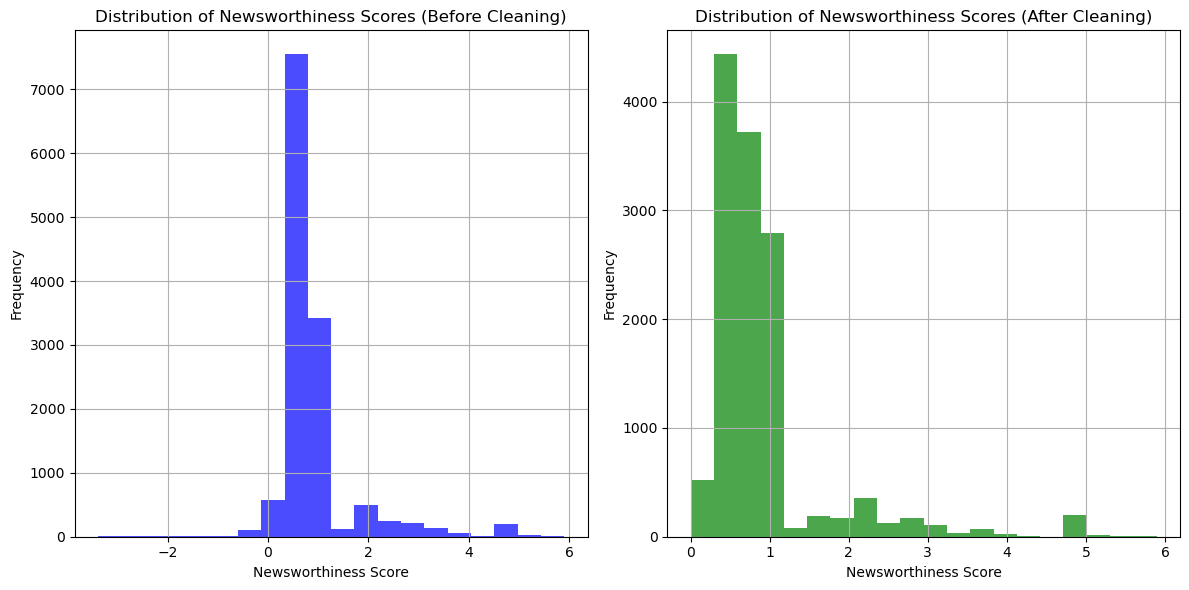

Total Tweets: 13192
Tweets with Low Scores: 167
Tweets with High Scores: 13025
Percentage of tweets with low score: 1.27%
Percentage of tweets with high score: 98.73%
Tweets Removed: 167


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming geo_tagged_data contains tweet data with 'newsworthiness_score' field
threshold = 0
print(f"Threshold based on median of newsworthiness scores: {threshold}")

# Step 1: Investigate Tweets with Low and High Scores
low_score_tweets = [tweet for tweet in geo_tagged_data if tweet['newsworthiness_score'] < threshold]
high_score_tweets = [tweet for tweet in geo_tagged_data if tweet['newsworthiness_score'] >= threshold]

# Step 2: Determine Threshold
# Let's calculate a threshold based on the median of newsworthiness scores


# Step 3: Remove Tweets with Low Scores
cleaned_data = [tweet for tweet in geo_tagged_data if tweet['newsworthiness_score'] >= threshold]

# Step 4: Justify Threshold
# We can analyze the distribution of scores and the separation of low and high-scored tweets

# Step 5: Provide Statistics
total_tweets = len(geo_tagged_data)
low_score_count = len(low_score_tweets)
high_score_count = len(high_score_tweets)
removed_count = total_tweets - len(cleaned_data)

# Step 6: Apply Visualization
# Plot histograms of newsworthiness scores before and after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist([tweet['newsworthiness_score'] for tweet in geo_tagged_data], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Newsworthiness Scores (Before Cleaning)')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([tweet['newsworthiness_score'] for tweet in cleaned_data], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Newsworthiness Scores (After Cleaning)')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Output Statistics
print(f"Total Tweets: {total_tweets}")
print(f"Tweets with Low Scores: {low_score_count}")
print(f"Tweets with High Scores: {high_score_count}")
print(f"Percentage of tweets with low score: {round((low_score_count/total_tweets)*100,2)}%")
print(f"Percentage of tweets with high score: {round((high_score_count/total_tweets)*100,2)}%")
print(f"Tweets Removed: {removed_count}")

#### Visualizing newsworthiness of both uncleaned and cleaned data with threshold = 0.777  (based on the median of newsworthiness scores).

Threshold based on median of newsworthiness scores: 0.7713313210227392


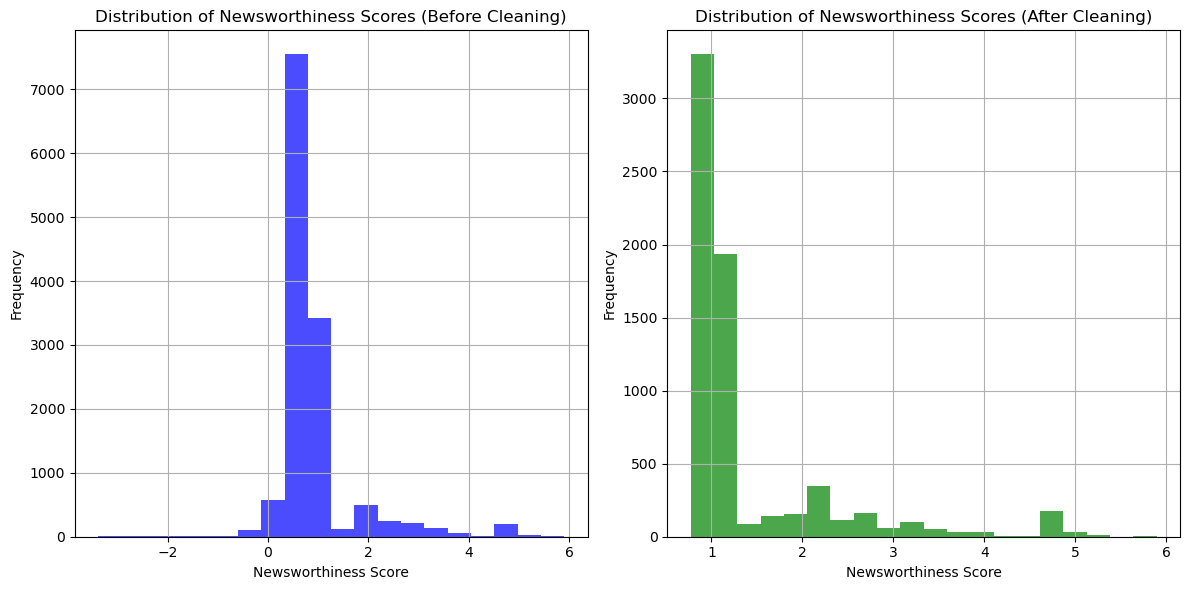

Total Tweets: 13192
Tweets with Low Scores: 6442
Tweets with High Scores: 6750
Percentage of tweets with low score: 48.83%
Percentage of tweets with high score: 51.17%
Tweets Removed: 6442


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Let's calculate a threshold based on the median of newsworthiness scores
threshold = np.median([tweet['newsworthiness_score'] for tweet in geo_tagged_data])
print(f"Threshold based on median of newsworthiness scores: {threshold}")


# Step 1: Investigate Tweets with Low and High Scores
low_score_tweets = [tweet for tweet in geo_tagged_data if tweet['newsworthiness_score'] < threshold]
high_score_tweets = [tweet for tweet in geo_tagged_data if tweet['newsworthiness_score'] >= threshold]

# Step 2: Remove Tweets with Low Scores
cleaned_data = [tweet for tweet in geo_tagged_data if tweet['newsworthiness_score'] >= threshold]

# Step 3: Provide Statistics
total_tweets = len(geo_tagged_data)
low_score_count = len(low_score_tweets)
high_score_count = len(high_score_tweets)
removed_count = total_tweets - len(cleaned_data)

# Step 4: Apply Visualization
# Plot histograms of newsworthiness scores before and after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist([tweet['newsworthiness_score'] for tweet in geo_tagged_data], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Newsworthiness Scores (Before Cleaning)')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist([tweet['newsworthiness_score'] for tweet in cleaned_data], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Newsworthiness Scores (After Cleaning)')
plt.xlabel('Newsworthiness Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Output Statistics
print(f"Total Tweets: {total_tweets}")
print(f"Tweets with Low Scores: {low_score_count}")
print(f"Tweets with High Scores: {high_score_count}")
print(f"Percentage of tweets with low score: {round((low_score_count/total_tweets)*100,2)}%")
print(f"Percentage of tweets with high score: {round((high_score_count/total_tweets)*100,2)}%")
print(f"Tweets Removed: {removed_count}")
